In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,0,0.258826,2.532100e-05,41.1414,15.87730,33.46870,0.095324,9.15839,fear
1,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,1,0.016925,1.391500e-07,63.5732,28.61190,1.63691,0.569473,5.59155,fear
2,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,2,0.095944,2.349850e-06,35.4845,9.79849,13.52990,8.988050,32.10300,fear
3,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,3,1.411020,3.130660e-04,43.9037,6.15238,17.37470,30.132300,1.02557,fear
4,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,4,1.127490,1.218520e-04,18.1006,56.51250,2.52799,2.319830,19.41150,happy


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          100 non-null    object 
 1   image_seq         100 non-null    int64  
 2   angry             100 non-null    float64
 3   disgust           100 non-null    float64
 4   fear              100 non-null    float64
 5   happy             100 non-null    float64
 6   sad               100 non-null    float64
 7   surprise          100 non-null    float64
 8   neutral           100 non-null    float64
 9   dominant_emotion  100 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 7.9+ KB


In [4]:
emotion_df.shape

(100, 10)

In [5]:
summary_stats = emotion_df.describe()
print(summary_stats)

        image_seq       angry       disgust        fear       happy  \
count  100.000000  100.000000  1.000000e+02  100.000000  100.000000   
mean    49.500000    1.531082  1.846983e-03   21.633298   21.428420   
std     29.011492    4.683116  7.318047e-03   24.906563   23.409376   
min      0.000000    0.000017  1.924780e-12    0.003125    0.002380   
25%     24.750000    0.048191  2.133243e-07    2.604662    3.423355   
50%     49.500000    0.384763  2.660785e-05   10.101240   13.237950   
75%     74.250000    1.101012  3.186135e-04   36.418800   30.653125   
max     99.000000   42.171200  5.464910e-02   95.139500   95.781900   

              sad    surprise     neutral  
count  100.000000  100.000000  100.000000  
mean    10.295898    7.268728   37.840726  
std     17.599308   19.010296   32.812847  
min      0.004126    0.000029    0.021739  
25%      0.499891    0.153879    7.150482  
50%      2.485550    0.931967   30.483550  
75%      9.359340    3.586158   65.437775  
max     

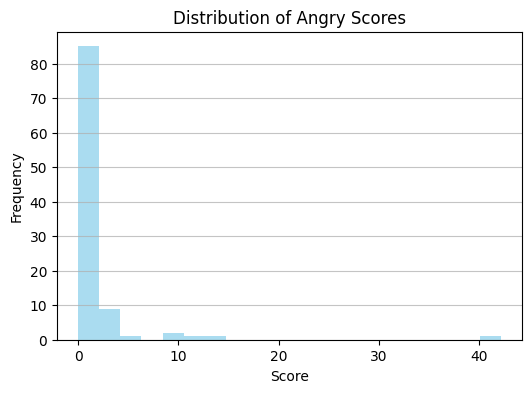

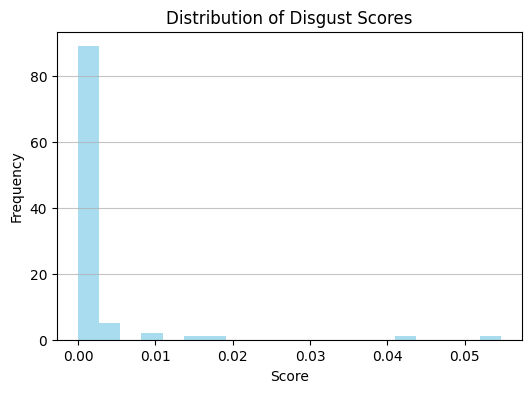

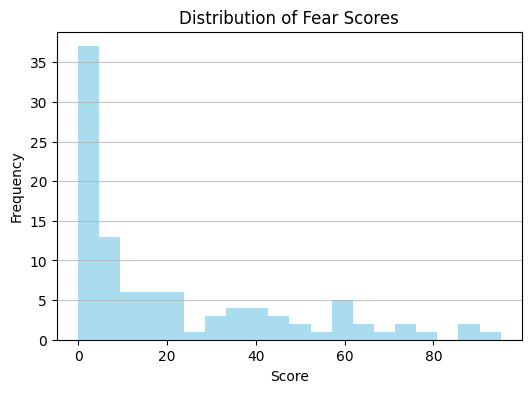

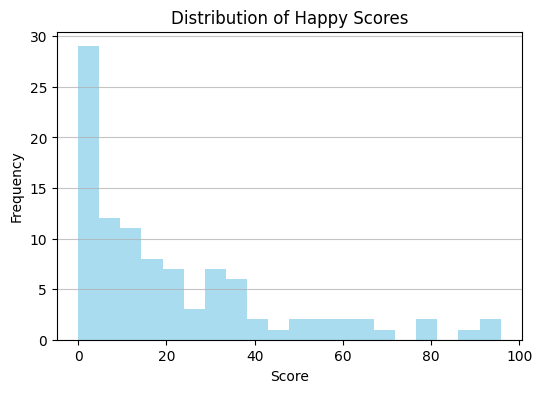

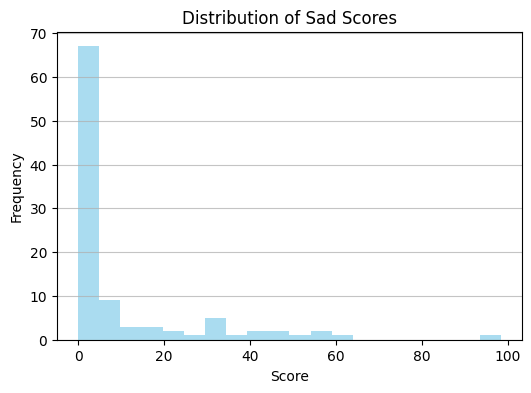

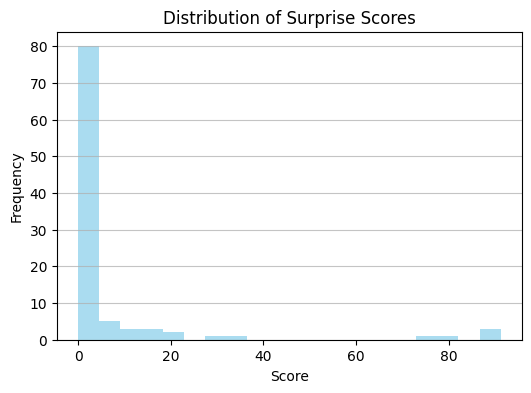

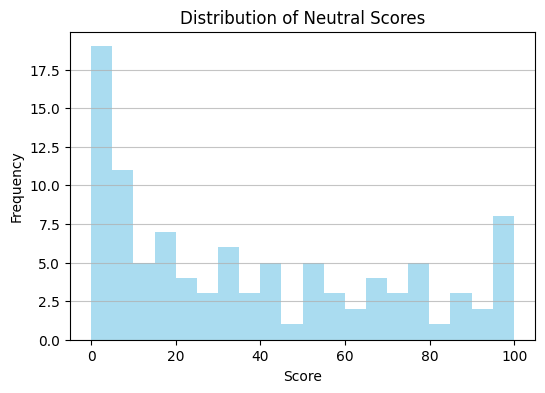

In [8]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

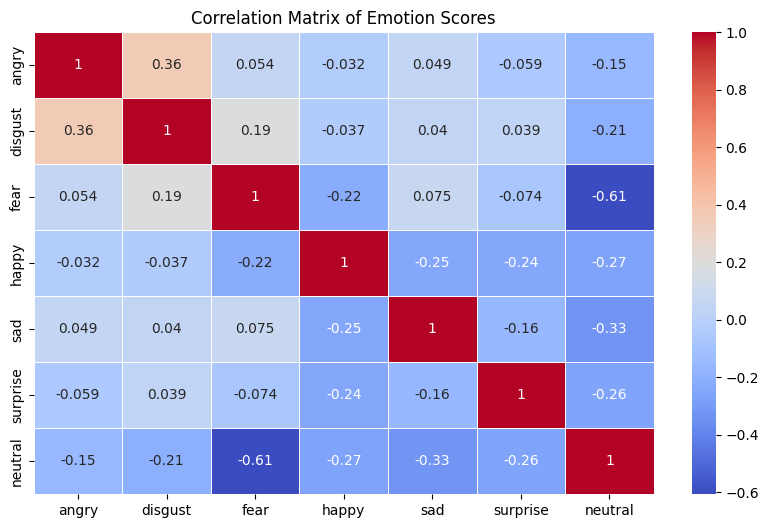

In [9]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

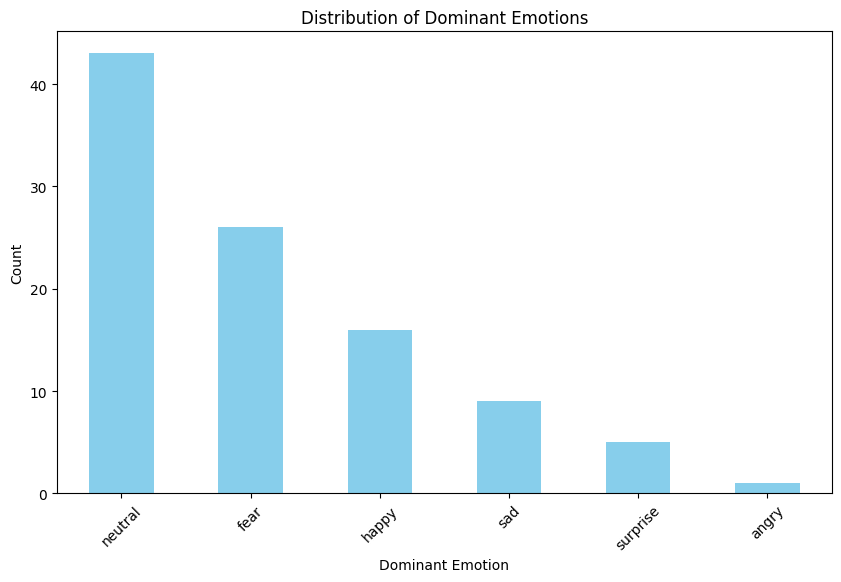

In [10]:
# Count the occurrences of each dominant emotion
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Plotting the distribution of dominant emotions
plt.figure(figsize=(10, 6))
dominant_emotion_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.title('Distribution of Dominant Emotions')
plt.xticks(rotation=45)
plt.show()

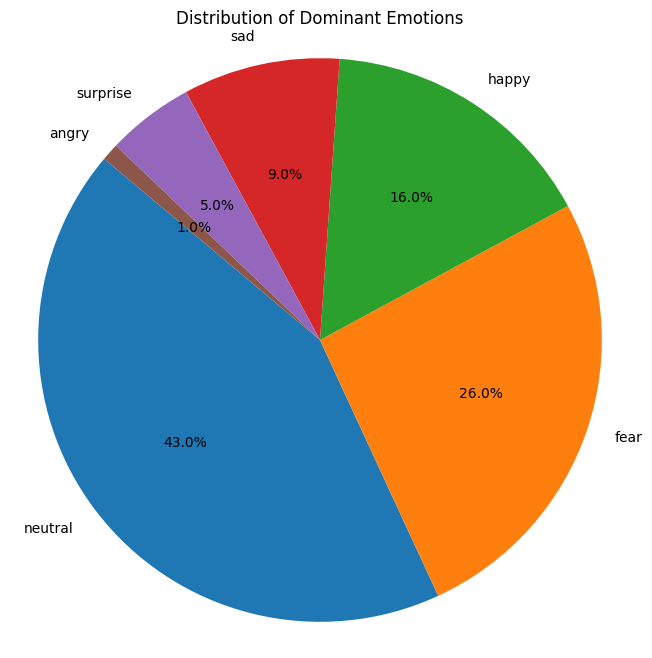

In [11]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [13]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,1,0,1,72.7051
1,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,2,0,0,32.5648
2,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,3,0,0,46.5201
3,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,4,0,0,25.0913
4,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,5,0,0,45.0658


In [14]:
gaze_df.shape

(100, 5)

In [15]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

         gaze       blink  eye_offset
count  100.00  100.000000  100.000000
mean     0.45    0.070000   30.137213
std      0.50    0.256432   18.909401
min      0.00    0.000000   -4.008000
25%      0.00    0.000000   16.542750
50%      0.00    0.000000   27.994050
75%      1.00    0.000000   41.106175
max      1.00    1.000000   91.234700


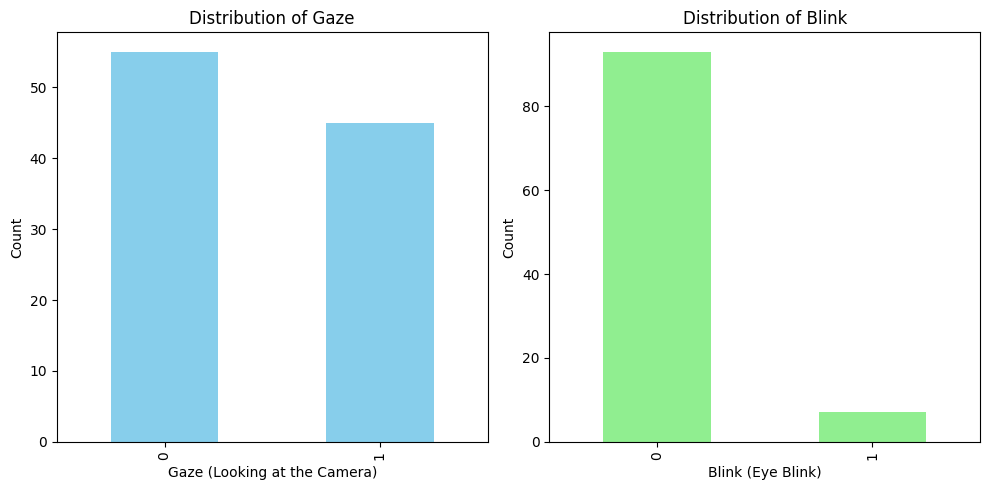

In [17]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

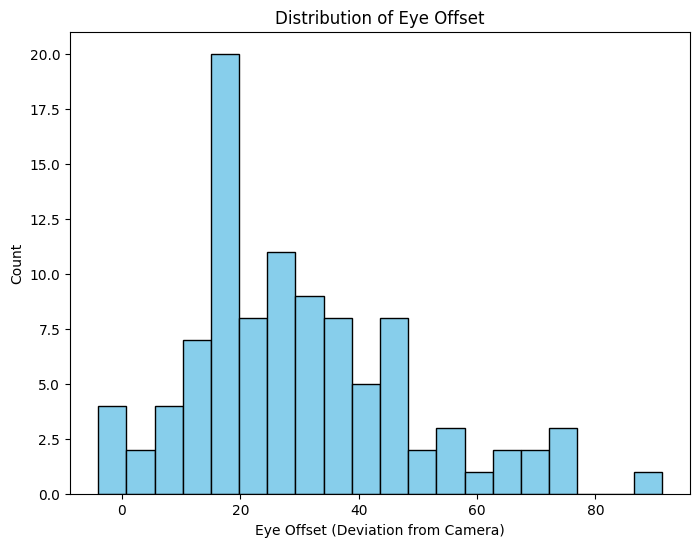

In [18]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [19]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,0,f299e1b2-7d92-4420-9c5a-d0d2590abdbe,1.0,2023-09-17 07:43:10,0.0
1,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,1,f299e1b2-7d92-4420-9c5a-d0d2590abdbe,2.0,2023-09-17 07:43:10,0.0
2,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,2,f299e1b2-7d92-4420-9c5a-d0d2590abdbe,3.0,2023-09-17 07:43:10,0.0
3,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,3,f299e1b2-7d92-4420-9c5a-d0d2590abdbe,4.0,2023-09-17 07:43:10,0.0
4,d0b9170b-98b9-48e1-a1b2-1d661bb0d853,4,f299e1b2-7d92-4420-9c5a-d0d2590abdbe,5.0,2023-09-17 07:43:10,0.0


In [20]:
metadata_df.shape

(100, 6)

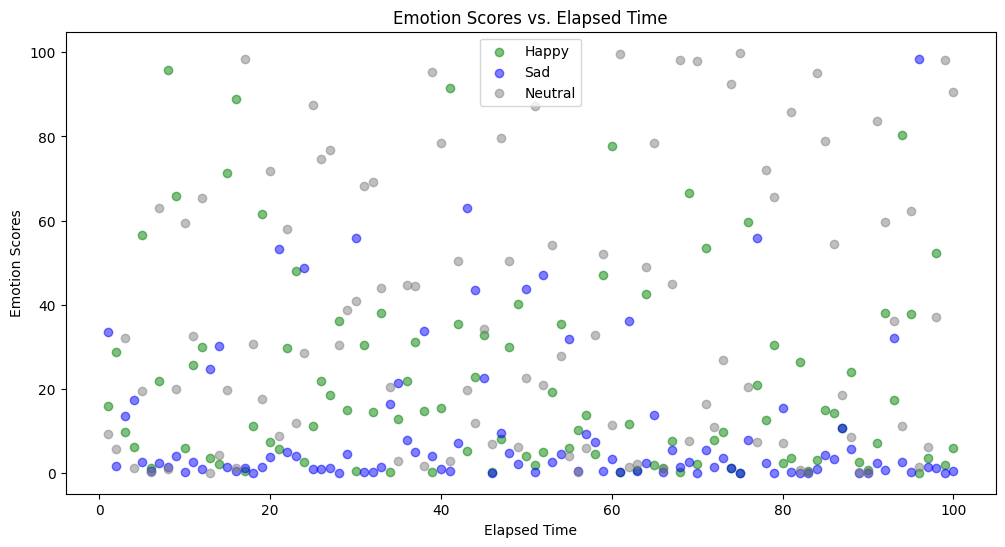

In [21]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [22]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

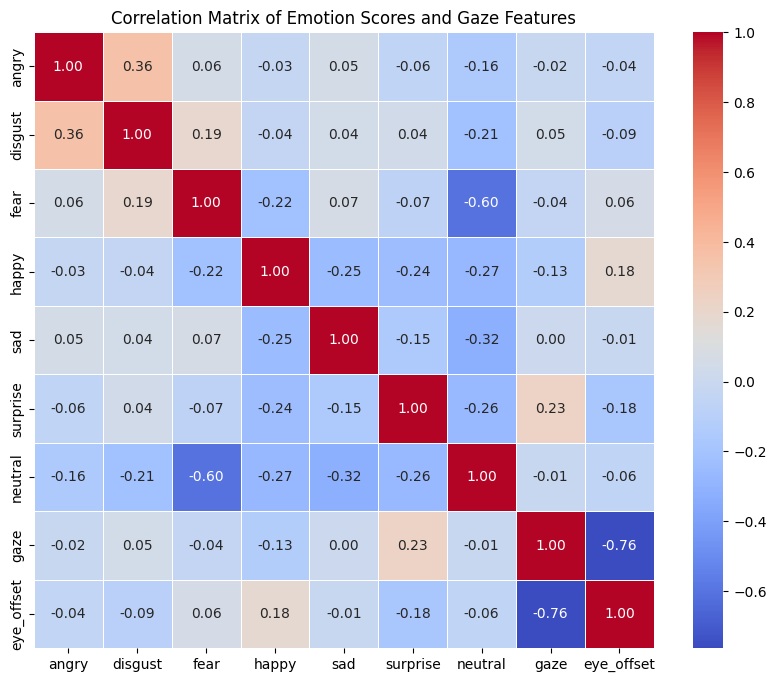

In [23]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'gaze', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [24]:
transcript_scores_df = pd.read_csv("3.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.00,3.00,My name is Michael Guzman and I am 21 years old.,"[50364, 1222, 1315, 307, 42854, 4271, 508, 152...",0.0,-0.337434,1.647458,0.166667,0.463382,0.253666,0.282952,0.839098,0.850701,0.628547,0.443204,3.666667
1,1,0,3.00,7.36,"Hailing from a small family in Varanasi, I ha...","[50514, 389, 23315, 490, 257, 1359, 1605, 294,...",0.0,-0.337434,1.647458,0.166667,0.498883,0.275251,0.225865,0.864237,0.717808,0.594307,0.382697,4.128440
2,2,0,7.36,11.36,given me the experience of living alone for t...,"[50732, 2212, 385, 264, 1752, 295, 2647, 3312,...",0.0,-0.337434,1.647458,0.166667,0.096212,0.731901,0.171887,0.001164,0.890285,0.148002,0.004134,4.000000
3,3,0,11.36,12.84,and challenging for me.,"[50932, 293, 7595, 337, 385, 13, 51006]",0.0,-0.337434,1.647458,0.166667,0.087091,0.879444,0.033466,0.002383,0.994522,0.006319,0.470965,2.702703
4,4,0,12.84,16.80,I completed my school being one of the top st...,"[51006, 286, 7365, 452, 1395, 885, 472, 295, 2...",0.0,-0.337434,1.647458,0.166667,0.823854,0.095513,0.080633,0.938361,0.230818,0.521346,0.722231,4.545455


In [25]:
transcript_scores_df.shape

(28, 18)

In [26]:
transcript_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 28 non-null     int64  
 1   seek               28 non-null     int64  
 2   start              28 non-null     float64
 3   end                28 non-null     float64
 4   text               28 non-null     object 
 5   tokens             28 non-null     object 
 6   temperature        28 non-null     float64
 7   avg_logprob        28 non-null     float64
 8   compression_ratio  28 non-null     float64
 9   no_speech_prob     28 non-null     float64
 10  positive           28 non-null     float64
 11  negative           28 non-null     float64
 12  neutral            28 non-null     float64
 13  confident          28 non-null     float64
 14  hesitant           28 non-null     float64
 15  concise            28 non-null     float64
 16  enthusiastic       28 non-nu

In [27]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

        positive   negative    neutral  confident   hesitant    concise  \
count  28.000000  28.000000  28.000000  28.000000  28.000000  28.000000   
mean    0.567257   0.264337   0.168406   0.573566   0.604004   0.394715   
std     0.283258   0.251135   0.111868   0.321698   0.234894   0.232922   
min     0.010479   0.002975   0.004540   0.001164   0.001167   0.006319   
25%     0.394705   0.094690   0.074649   0.334525   0.477667   0.178582   
50%     0.581371   0.214144   0.171494   0.697194   0.606533   0.404061   
75%     0.805528   0.363048   0.247356   0.814442   0.782730   0.580721   
max     0.992485   0.971378   0.382125   0.992362   0.994522   0.887560   

       enthusiastic  speech_speed  
count     28.000000     28.000000  
mean       0.448050      3.385636  
std        0.312083      0.867994  
min        0.004134      1.000000  
25%        0.179011      2.963017  
50%        0.426116      3.558000  
75%        0.725450      4.000000  
max        0.995513      4.945055  


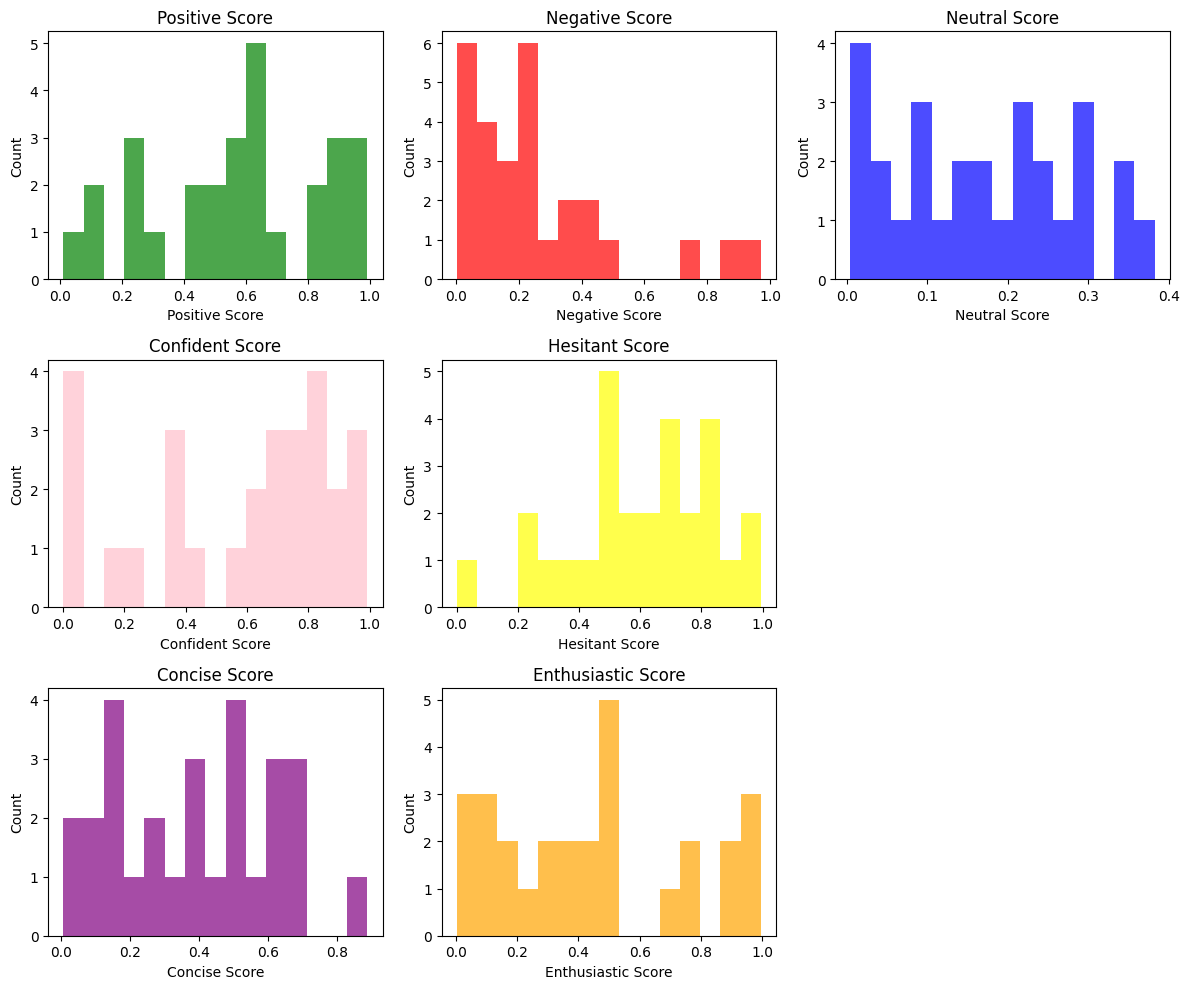

In [28]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

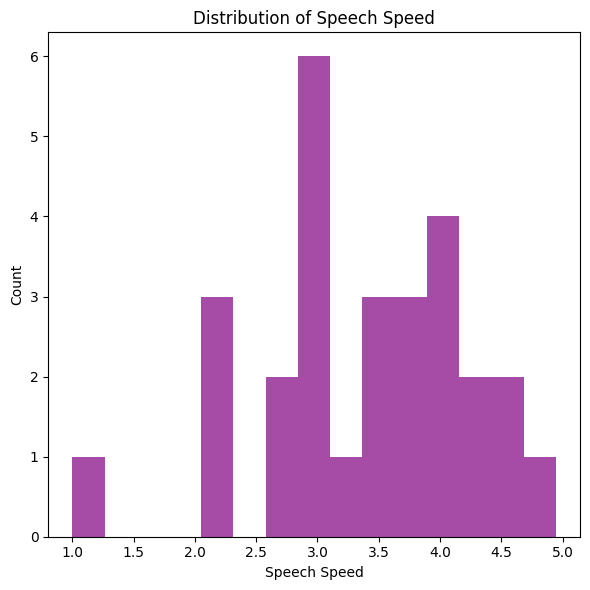

In [30]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

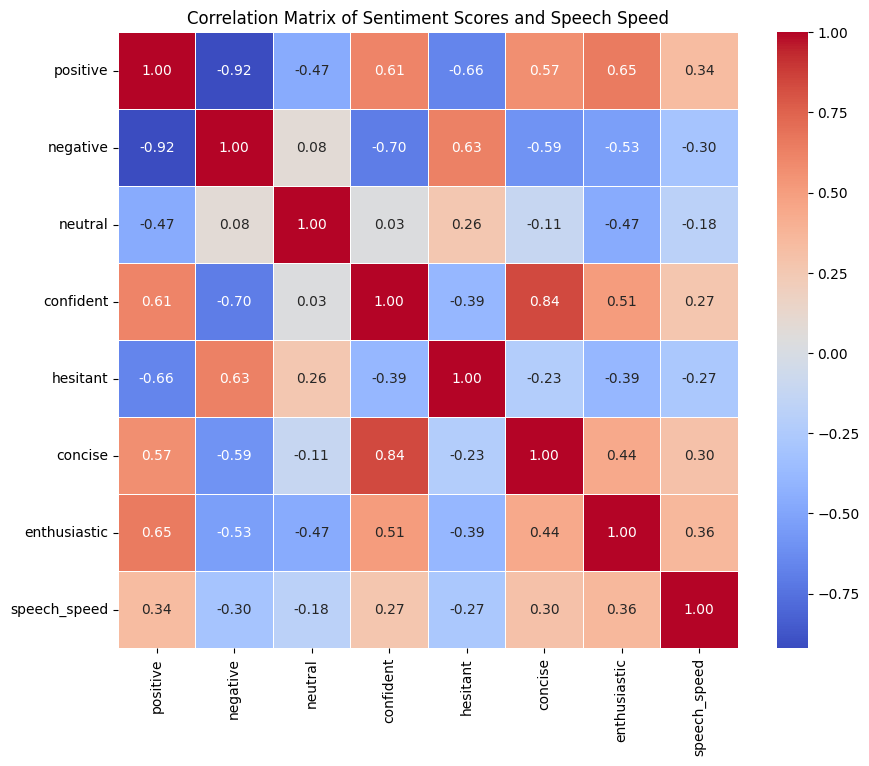

In [31]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

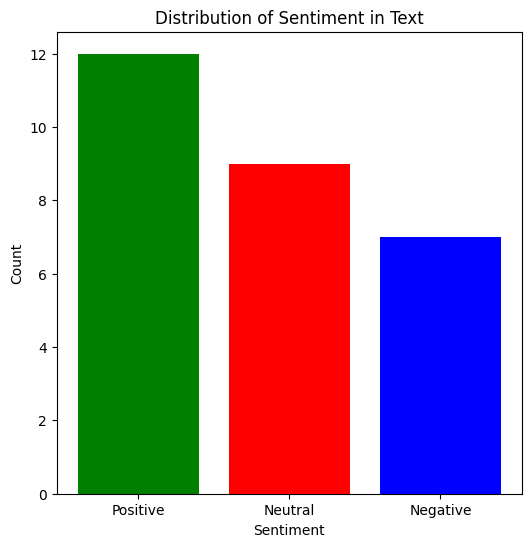

In [32]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [33]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])

                                                 text dominant_quality
0    My name is Michael Guzman and I am 21 years old.         hesitant
1    Hailing from a small family in Varanasi, I ha...        confident
2    given me the experience of living alone for t...         hesitant
3                             and challenging for me.         hesitant
4    I completed my school being one of the top st...        confident
5    of the school student council as the activity...        confident
6    Later on, I gave the undergraduate entrance e...         positive
7    and pursued to become honours from Varanasi U...         negative
8           most of my college life was spent online.         hesitant
9    During my very day days when I had the opport...        confident
10   as a member of the National Service Team, wor...         positive
11                  through small yet powerful steps.         positive
12   During lockdown, I helped in spreading awaren...         positive
13    

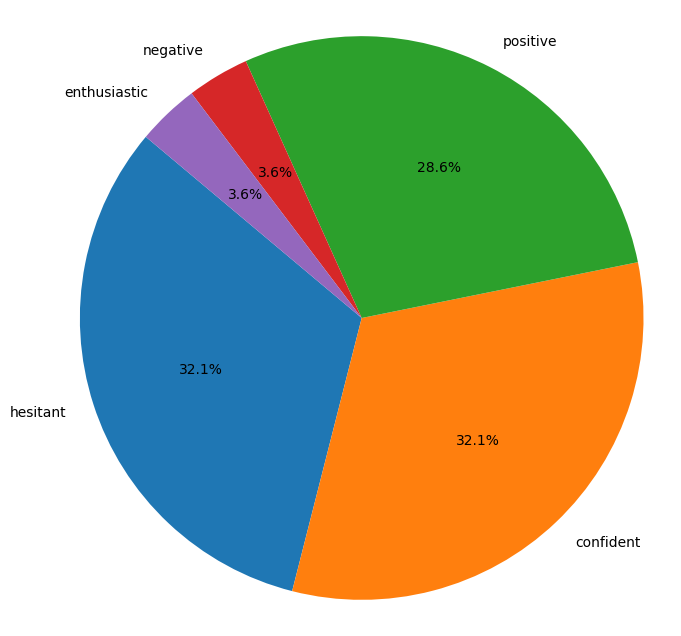

In [34]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [35]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 0.43,
 'fear': 0.26,
 'happy': 0.16,
 'sad': 0.09,
 'surprise': 0.05,
 'angry': 0.01}

In [36]:
emotion_percentage_dict['disgust']=0

In [37]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [38]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 13.49689673568819


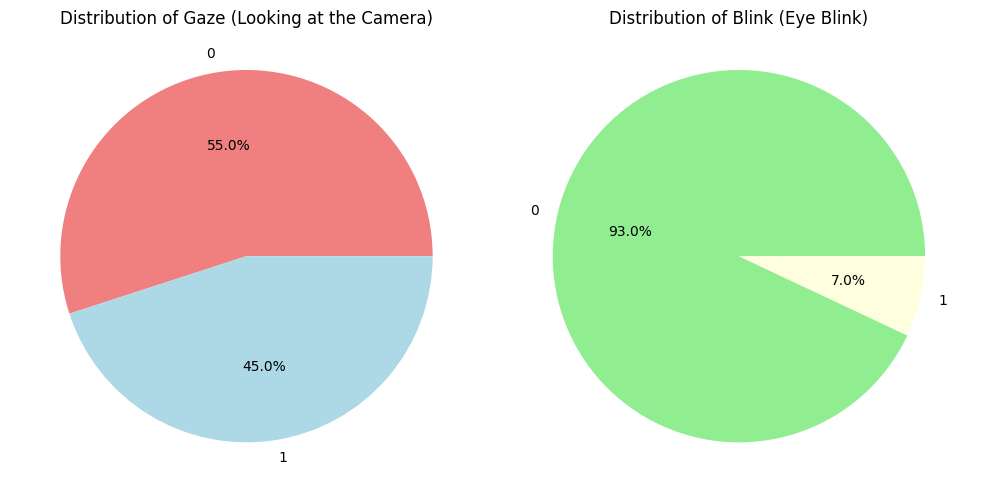

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [40]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [41]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [42]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.05614003888888891

In [43]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'hesitant': 0.32142857142857145,
 'confident': 0.32142857142857145,
 'positive': 0.2857142857142857,
 'negative': 0.03571428571428571,
 'enthusiastic': 0.03571428571428571}

In [44]:
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0

In [45]:
sentiment_percentage_dict

{'hesitant': 0.32142857142857145,
 'confident': 0.32142857142857145,
 'positive': 0.2857142857142857,
 'negative': 0.03571428571428571,
 'enthusiastic': 0.03571428571428571,
 'concise': 0,
 'neutral': 0}

In [46]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [53]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

0.15885088632013333

In [48]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [49]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.6766854512947819


In [55]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

18.412692816474546